-0.09780733928324338 91.7527695044659 -0.7867494167540613 5.127433348232849e-06 0.016360652222324166
-0.11682486398189702 92.77850396669643 -0.7428970516987659 3.20874284286209e-05 0.022443196138617314
-0.08499841672626045 92.82886541946058 -0.7818851966864983 6.411899426617651e-06 0.01444903808620205


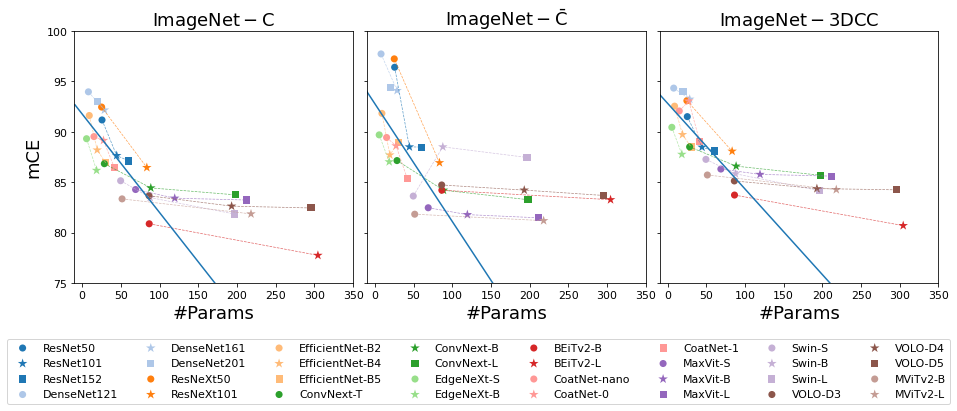

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy import stats

models = {'ResNet': {'model': ['ResNet50', 'ResNet101','ResNet152'], 
                     'params': [25.557,44.549,60.193],
                     'mCE-3dcc': [91.5, 88.47,88.09], 'rCE-3dcc': [],
                     'mCE-C': [ 91.17, 87.64,87.1], 'rCE-C': [],
                     'mCE-Cbar': [96.4, 88.5,88.48], 'rCE-Cmark': []},
          'DenseNet': {'model': ['DenseNet121','DenseNet161','DenseNet201'], 
                     'params': [7.979,28.681,20.014],
                     'mCE-3dcc': [94.33,93.23,93.97,], 'rCE-3dcc': [],
                     'mCE-C': [93.96,92.16,93.04,], 'rCE-C': [],
                     'mCE-Cbar': [97.72,94.09,94.36], 'rCE-Cmark': []},
          'ResNeXt': {'model': ['ResNeXt50', 'ResNeXt101'], 

                     'params': [25.048,83.455],
                     'mCE-3dcc': [93.08, 88.07], 'rCE-3dcc': [],
                     'mCE-C': [92.45, 86.45], 'rCE-C': [],
                     'mCE-Cbar': [97.23, 86.93], 'rCE-Cmark': []},
          'EfficientNet': {'model': ['EfficientNet-B2','EfficientNet-B4','EfficientNet-B5'], 
                     'params': [9.11,19.342,30.39],
                     'mCE-3dcc': [92.54,89.72,88.49], 'rCE-3dcc': [],
                     'mCE-C': [91.61,88.19,86.91], 'rCE-C': [],
                     'mCE-Cbar': [91.82,87.7,88.95], 'rCE-Cmark': []},
          'ConvNext': {'model': ['ConvNext-T','ConvNext-B', 'ConvNext-L'], 
                       'params': [28.585,88.591,197.767],
                       'mCE-3dcc': [88.5,86.59, 85.68], 'rCE-3dcc': [],
                       'mCE-C': [86.83,84.43, 83.74,], 'rCE-C': [],
                       'mCE-Cbar': [87.14,84.2, 83.26,], 'rCE-Cmark': []},
          'EdgeNeXt': {'model': ['EdgeNeXt-S','EdgeNeXt-B'], 
                     'params': [5.587,18.511],
                     'mCE-3dcc': [90.44,87.76,], 'rCE-3dcc': [],
                     'mCE-C': [89.31,86.17,], 'rCE-C': [],
                     'mCE-Cbar': [89.69,87.02,], 'rCE-Cmark': []},
          'BEiT': {'model': ['BEiTv2-B', 'BEiTv2-L',],  'params': [86.531,304.431, ],
                     'mCE-3dcc': [83.72, 80.69, ], 'rCE-3dcc': [],
                     'mCE-C': [80.87, 77.74, ], 'rCE-C': [],
                     'mCE-Cbar': [84.2, 83.26, ], 'rCE-Cmark': []},
          'CoatNet': {'model': ['CoatNet-nano','CoatNet-0','CoatNet-1'],  'params': [15.141,27.436, 41.722],
                     'mCE-3dcc': [92.06,93.05, 89], 'rCE-3dcc': [],
                     'mCE-C': [89.52,89.14, 86.41 ], 'rCE-C': [],
                     'mCE-Cbar': [89.43,88.6, 85.38], 'rCE-Cmark': []},

          'MaxVit': {'model': ['MaxVit-S','MaxVit-B','MaxVit-L'],  'params': [68.928, 119.468, 211.786],
                     'mCE-3dcc': [86.3,85.77,85.6 ], 'rCE-3dcc': [],
                     'mCE-C': [84.27,83.41,83.23 ], 'rCE-C': [],
                     'mCE-Cbar': [82.46,81.78,81.46 ], 'rCE-Cmark': []},
          'Swin': {'model': ['Swin-S','Swin-B', 'Swin-L', ],  'params': [49.606,87.768, 196.532, ],
                     'mCE-3dcc': [87.26,85.83, 84.15, ], 'rCE-3dcc': [],
                     'mCE-C': [85.14,83.47, 81.84, ], 'rCE-C': [],
                     'mCE-Cbar': [83.62,88.5, 87.45, ], 'rCE-Cmark': []},

        'VOLO': {'model': ['VOLO-D3', 'VOLO-D4','VOLO-D5', ],  'params': [86.325,192.962,295.456, ],
                    'mCE-3dcc': [85.12,84.36, 84.24, ], 'rCE-3dcc': [],
                    'mCE-C': [83.65,82.62, 82.44, ], 'rCE-C': [],
                    'mCE-Cbar': [84.72,84.21, 83.68, ], 'rCE-Cmark': []},
        'MViTv2': {'model': ['MViTv2-B','MViTv2-L' ],  'params': [51.473,217.993 ],
                'mCE-3dcc': [85.71, 84.26], 'rCE-3dcc': [],
                'mCE-C': [83.34, 81.85 ], 'rCE-C': [],
                'mCE-Cbar': [81.82,81.18 ], 'rCE-Cmark': []},
         }

x_model_size = [86.531,304.431,15.141,27.436,41.722,28.585,88.591,197.767,7.979,28.681,20.014,18.511,5.587,9.11,19.342,30.39,
                68.928,119.468,211.786,51.473,217.993,25.557,44.549,60.193,25.048,83.455,49.606,87.768,196.532,86.325,192.962,295.456]
y_mCE = {0: [80.87,77.74,89.52,89.14,86.41,86.83,84.43,83.74,93.96,92.16,93.04,86.17,89.31,91.61,88.19,86.91,84.27,83.41,83.23,83.34,
             81.85,91.17,87.64,87.1,92.45,86.45,85.14,83.47,81.84,83.65,82.62,82.44],
          1: [79.75,77.06,89.43,88.6,85.38,87.14,84.2,83.26,95.67,94.09,94.36,87.02,89.69,91.82,87.7,88.95,82.46,81.78,81.46,81.82,81.18,
              92.63,88.5,88.48,94.21,86.93,83.62,81.46,80.05,84.72,84.21,83.68], 
          2: [83.72,80.69,92.06,93.05,89,88.5,86.59,85.68,94.33,93.23,93.97,87.76,89.61,92.54,89.72,88.49,86.3,85.77,85.6,85.71,84.26,91.5,
              88.47,88.09,93.08,88.07,87.26,85.83,84.15,85.12,84.36,84.24]}
colors = cm.tab20(range(50))

markers = ['o',  # circle
           '*',  # star 
           's',  # square 
           'd',  # diamond
           '^',  # triangle_up
           '1'   # tri_down
          ]
marker_size = [50, 100, 50, 50, 30,30]
datasets = ['mCE-C','mCE-Cbar','mCE-3dcc']
datasets_name = [r'$\mathrm{ImageNet-C}$',r'$\mathrm{ImageNet-\bar{C}}$',r'$\mathrm{ImageNet-3DCC}$']
fig, axs = plt.subplots(1,3,sharex=True,sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)

for dataset_i in range(3):

    model_names = []
    for c, model in enumerate(models):
        # scatter plot
        for j, m in enumerate(models[model]['model']):
            model_names.append(m)
            axs[dataset_i].scatter(models[model]['params'][j], 
                    models[model][datasets[dataset_i]][j],
                    color=colors[c],  marker=markers[j], s=marker_size[j], 
                    edgecolors='none',)

    plt.legend(model_names, bbox_to_anchor=(-0.65, -.35),loc = 'center',ncol=8)

    # line plot
    for c, model in enumerate(models):
        axs[dataset_i].plot(models[model]['params'], models[model][datasets[dataset_i]], 
            linestyle='--', color=colors[c], alpha=0.7, linewidth=0.7)
    # fit the linear function
    xlim = np.array(axs[0].get_xlim())
    x_model_size = np.asarray(x_model_size)
    # remove results of large models
    def remove_large(x,y):
        y_removed = []
        for i in range(len(x)):
            if x[i] < 100:
                y_removed.append(y[i])
            
        return  y_removed

    y = remove_large(x_model_size,y_mCE[dataset_i])
    x = x_model_size[x_model_size<100]
   

    gradient, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
    print(gradient, intercept, r_value, p_value, slope_std_error)
    axs[dataset_i].plot(xlim, gradient * xlim + intercept, '-')
    axs[dataset_i].set_xlabel('#Params',fontsize=18)
    axs[0].set_ylabel('mCE',fontsize=18)
    axs[dataset_i].set_title(datasets_name[dataset_i],fontsize=18)

plt.ylim((75,100))
plt.xlim((-10,350))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.8, wspace=0.05, hspace=-0.85)
plt.rcParams.update({'font.size': 11})
plt.savefig('plot_imagenetbenchmark.pdf',bbox_inches='tight')

